In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus 
from sklearn import tree
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
import matplotlib.image as pltimg


In [2]:
data = pd.read_csv('Documents\\MIT\\MDA512\\Assignment\\all_perth_310121\\all_perth_310121.csv')
data

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,03-2016\r,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0
33652,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,10-2016\r,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

DATA WRANGLING

In [4]:
data.isna().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

In [5]:
data_clean=data.dropna(subset=['BUILD_YEAR', 'GARAGE', 'NEAREST_SCH_RANK']) #dropped NAs only in the column 'BUILD_YEAR' and 'GARAGE'
#data_clean= data_clean.drop('NEAREST_SCH_RANK', axis=1) #drop the whole column as there are more than 30% of missing values
count_row = data_clean.shape[0]
print(count_row)

19208


In [6]:
data_clean.isna().sum()

ADDRESS             0
SUBURB              0
PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN         0
NEAREST_STN_DIST    0
DATE_SOLD           0
POSTCODE            0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH         0
NEAREST_SCH_DIST    0
NEAREST_SCH_RANK    0
dtype: int64

In [7]:
# finding duplicates in the dataset
duplicates = data_clean.duplicated()
data_clean[duplicates]

#no duplicates


,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK


In [8]:
#convert column DATE_SOLD into a date feature

data_clean['DATE_SOLD']=pd.to_datetime(data_clean['DATE_SOLD'])
data_clean['YEAR_SOLD']=data_clean['DATE_SOLD'].apply(lambda x:x.year)
data_clean['MONTH_SOLD']=data_clean['DATE_SOLD'].apply(lambda x:x.month)
#drop the column with the date type
data_clean=data_clean.drop('DATE_SOLD',axis=1)
data_clean

<ipython-input-8-2f450a4af932>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['DATE_SOLD']=pd.to_datetime(data_clean['DATE_SOLD'])
<ipython-input-8-2f450a4af932>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['YEAR_SOLD']=data_clean['DATE_SOLD'].apply(lambda x:x.year)
<ipython-input-8-2f450a4af932>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK,YEAR_SOLD,MONTH_SOLD
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0,2019,2
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0,2015,6
9,1 Arundel Street,Bayswater,685000,3,2,8.0,552,126,1999.0,5900,Bayswater Station,508,6053,-31.917880,115.907050,CHISHOLM CATHOLIC COLLEGE,0.936243,29.0,2019,10
11,1 Ashcott Gate,Butler,367500,3,2,2.0,398,158,2003.0,36300,Butler Station,2100,6036,-31.654280,115.702200,BUTLER COLLEGE,0.680843,39.0,2018,11
13,1 Ashendon Boulevard,Hammond Park,535000,4,2,4.0,704,247,2002.0,23100,Cockburn Central Station,3900,6164,-32.159590,115.849480,ATWELL COLLEGE,2.220643,129.0,2019,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33646,9B North Street,Swanbourne,1700000,4,3,4.0,414,277,2009.0,9400,Grant Street Station,558,6010,-31.981771,115.765149,SCOTCH COLLEGE,0.762346,24.0,2017,4
33648,9B Teocote Crescent,Aubin Grove,423000,3,2,2.0,248,108,2011.0,24900,Cockburn Central Station,5700,6164,-32.176013,115.858357,ATWELL COLLEGE,3.607062,129.0,2016,5
33649,9B Viveash Road,Middle Swan,467000,4,2,2.0,400,132,2014.0,17100,Midland Station,2500,6056,-31.872192,116.013543,LA SALLE COLLEGE,1.116806,53.0,2015,4
33650,9b Wesley Street,South Fremantle,955000,3,2,1.0,200,127,1997.0,16000,Fremantle Station,1900,6162,-32.066410,115.756070,FREMANTLE COLLEGE,1.134956,128.0,2019,2


In [9]:
#drop ADDRESS, POSTCODE, NEAREST_STN, NEAREST_SCH columns as they don't bring any value
data_clean=data_clean.drop('ADDRESS', axis=1)#drop the address column
data_clean=data_clean.drop('POSTCODE',axis=1)#drop the column POSTCODE
data_clean=data_clean.drop('NEAREST_STN',axis=1)#drop the column NEAREST_STN
data_clean=data_clean.drop('NEAREST_SCH',axis=1)#drop the column NEAREST_SCH

array([[<AxesSubplot:title={'center':'PRICE'}>,
        <AxesSubplot:title={'center':'BEDROOMS'}>,
        <AxesSubplot:title={'center':'BATHROOMS'}>,
        <AxesSubplot:title={'center':'GARAGE'}>],
       [<AxesSubplot:title={'center':'LAND_AREA'}>,
        <AxesSubplot:title={'center':'FLOOR_AREA'}>,
        <AxesSubplot:title={'center':'BUILD_YEAR'}>,
        <AxesSubplot:title={'center':'CBD_DIST'}>],
       [<AxesSubplot:title={'center':'NEAREST_STN_DIST'}>,
        <AxesSubplot:title={'center':'LATITUDE'}>,
        <AxesSubplot:title={'center':'LONGITUDE'}>,
        <AxesSubplot:title={'center':'NEAREST_SCH_DIST'}>],
       [<AxesSubplot:title={'center':'NEAREST_SCH_RANK'}>,
        <AxesSubplot:title={'center':'YEAR_SOLD'}>,
        <AxesSubplot:title={'center':'MONTH_SOLD'}>, <AxesSubplot:>]],
      dtype=object)

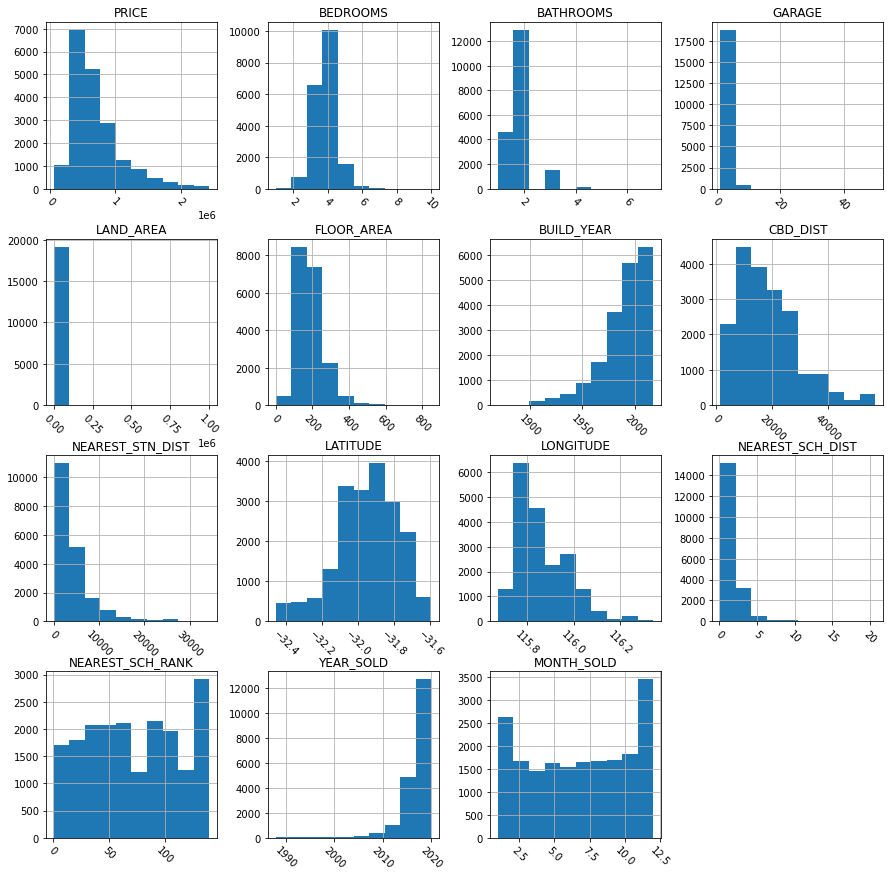

In [10]:
# visualise all numerical features in histogram to see a distibution and spot the outliers
data_clean.hist(figsize=(15,15), xrot=-45)

In [11]:
data_clean.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK,YEAR_SOLD,MONTH_SOLD
count,1.920800e+04,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000
mean,6.998658e+05,3.676020,1.861776,2.183205,2441.914879,187.532330,1988.922741,18327.112922,4188.389681,-31.949166,115.864546,1.684322,72.094492,2016.911027,6.773584
std,3.872944e+05,0.750726,0.587704,1.221165,18446.099139,72.985315,21.907656,10937.511971,4172.353928,0.167803,0.109222,1.570357,40.672225,3.068617,3.393757
min,5.200000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1870.000000,1300.000000,46.000000,-32.455550,115.675834,0.070912,1.000000,1988.000000,1.000000
25%,4.380000e+05,3.000000,2.000000,2.000000,494.000000,134.000000,1977.000000,10100.000000,1600.000000,-32.047148,115.778941,0.866041,38.000000,2016.000000,4.000000
50%,5.850000e+05,4.000000,2.000000,2.000000,675.000000,177.000000,1995.000000,15800.000000,3000.000000,-31.937099,115.842006,1.301665,65.000000,2018.000000,7.000000
75%,8.500000e+05,4.000000,2.000000,2.000000,809.000000,228.000000,2005.000000,24300.000000,5100.000000,-31.823297,115.940476,1.957117,105.000000,2019.000000,10.000000
max,2.440000e+06,10.000000,7.000000,50.000000,999999.000000,849.000000,2017.000000,56900.000000,34300.000000,-31.595910,116.341780,20.720911,139.000000,2020.000000,12.000000


In [12]:
#Column Garage contains max value 99, which is most likely an outlier due to an error.
#select the rows with values bigger than 10 in the column GARAGE 
#trying to bring more sense and taking into consideration that the maximum number of bedrooms is 10, 
#I'll set the maximum number of garages as 10 too, assuming there is 1 car space per bedroom
data_clean_garage = data_clean[(data_clean['GARAGE']>10)]
data_clean_garage.head() 
#Looking at the selected data I can assume that the values in the GARAGE column are errors and should be removed from the dataset
#as 3bedroom house for $360000 and land size 692 doubtly has a garage with a capacity of 12 cars.

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK,YEAR_SOLD,MONTH_SOLD
1777,Koondoola,360000,3,1,12.0,692,96,1977.0,12600,5600,-31.838650,115.854980,0.987144,46.0,2016,9
1819,Parkerville,780000,4,2,12.0,20054,170,2000.0,27800,12800,-31.840450,116.121940,7.991954,78.0,2013,5
3261,Hazelmere,650000,4,2,12.0,1358,288,2006.0,13900,1500,-31.905220,115.994620,1.729780,52.0,2016,7
4188,Oakford,980000,4,2,16.0,20400,302,2002.0,26800,8200,-32.188750,115.910540,6.626130,129.0,2016,3
8521,Glen Forrest,815000,3,2,17.0,9890,165,1996.0,25200,11600,-31.913106,116.121174,2.876641,78.0,2019,1


In [13]:
#rewrite the dataset with values less than 10 in the column GARAGE
data_clean=data_clean[(data_clean['GARAGE']<10)]

In [14]:
data_clean.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK,YEAR_SOLD,MONTH_SOLD
count,1.915800e+04,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000
mean,6.993036e+05,3.674444,1.861155,2.151999,2409.564412,187.350559,1988.931726,18314.833751,4177.236037,-31.949131,115.864240,1.680889,72.063890,2016.913509,6.772575
std,3.871835e+05,0.749119,0.587434,1.001679,18443.723737,72.798950,21.908846,10937.850349,4163.854228,0.167798,0.109020,1.566543,40.681259,3.068766,3.393709
min,5.200000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1870.000000,1300.000000,46.000000,-32.455550,115.675834,0.070912,1.000000,1988.000000,1.000000
25%,4.375000e+05,3.000000,2.000000,2.000000,493.000000,134.000000,1977.000000,10100.000000,1600.000000,-32.047128,115.778852,0.865559,38.000000,2016.000000,4.000000
50%,5.850000e+05,4.000000,2.000000,2.000000,674.000000,177.000000,1995.000000,15800.000000,3000.000000,-31.937105,115.841752,1.300488,65.000000,2018.000000,7.000000
75%,8.500000e+05,4.000000,2.000000,2.000000,809.000000,227.000000,2005.000000,24300.000000,5100.000000,-31.823280,115.939923,1.953227,105.000000,2019.000000,10.000000
max,2.440000e+06,10.000000,7.000000,9.000000,999999.000000,849.000000,2017.000000,56900.000000,34300.000000,-31.595910,116.341780,20.720911,139.000000,2020.000000,12.000000


In [15]:
#do the same with the LAND_AREA because maximum value 999999 looks suspecious and histogram shows that there's an outlier.
data_clean_land = data_clean[(data_clean['LAND_AREA']>500000)]
data_clean_land.head() 
#Considering the price and the number of bedrooms for the land area 999999, and also there is only 4 records, 
#I can assume that these values are errors and should be removed from the dataset

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK,YEAR_SOLD,MONTH_SOLD
2684,Aveley,375000,4,2,2.0,999999,175,2016.0,21400,11000,-31.789232,115.999298,1.427274,53.0,2018,5
3575,Aveley,385000,3,2,2.0,999999,140,2015.0,22400,11300,-31.789982,115.998233,1.302166,53.0,2020,9
16791,Alkimos,545000,4,2,2.0,983690,216,2015.0,39500,1300,-31.626927,115.691071,3.218389,39.0,2019,12
27619,Aveley,365000,4,2,2.0,999999,172,2015.0,21400,11000,-31.790640,115.998892,1.335798,53.0,2020,6


In [16]:
#rewrite the dataset with values less than 10 in the column GARAGE
data_clean=data_clean[(data_clean['LAND_AREA']<500000)]

<AxesSubplot:xlabel='BEDROOMS', ylabel='PRICE'>

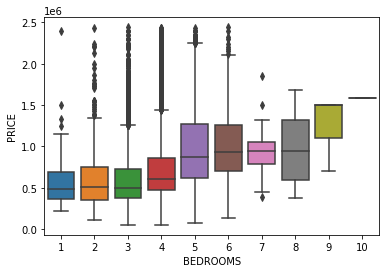

In [17]:
#explore outliers
sns.boxplot(x='BEDROOMS', y='PRICE', data=data_clean)

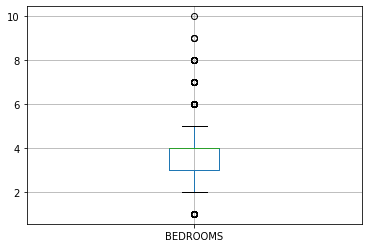

In [18]:
data_clean.boxplot(column=['BEDROOMS'])
plt.show()

EXPLORATORY DATA ANALYSIS

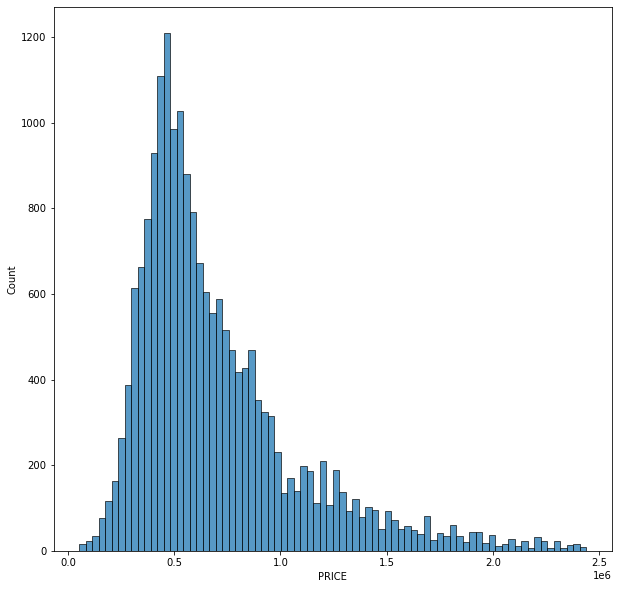

In [19]:
#Visialise the spread of the data using histogram
#Set the figure size
plt.figure(figsize=(10,10))
# Plot the prices
sns.histplot(data_clean['PRICE'])
plt.show()

In [20]:
data_clean['PRICE'].agg(['skew', 'kurtosis']).transpose()

skew        1.574389
kurtosis    2.750934
Name: PRICE, dtype: float64

<AxesSubplot:xlabel='BEDROOMS'>

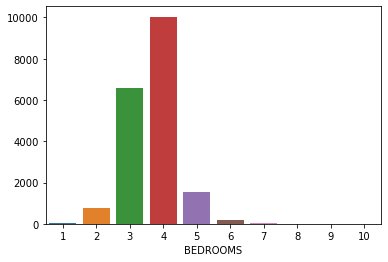

In [21]:
#group the records by number of bedrooms
data_bedrooms =data_clean.groupby('BEDROOMS')['BEDROOMS'].count()

#plot the data by creating a bar chart in 'flare' colorset
sns.barplot(y=data_bedrooms.values, x=data_bedrooms.index)

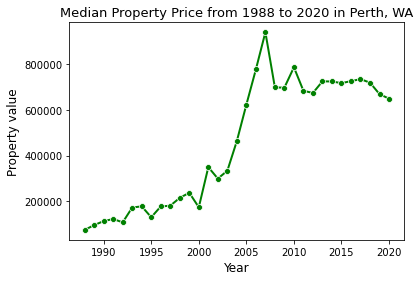

In [22]:
#group the records by year and calculate an average price per year
data_year=data_clean[['PRICE','YEAR_SOLD']]
data_year =data_year.groupby(['YEAR_SOLD']).mean()
data_year

#plot the data by creating a line plot
#plt_pr=sns.lineplot(data=data_year, x="YEAR_SOLD", y="PRICE", linewidth=2, color="green", marker='o')
#plt_pr.set(title='Median property price from 1988 to 2020')


fig, ax = plt.subplots(figsize = ( 6, 4 ))
  
# Plot the scatterplot
sns.lineplot( ax = ax , x="YEAR_SOLD", y="PRICE", data = data_year, linewidth=2, color="green", marker='o')
  
# Set label for x-axis
ax.set_xlabel( "Year" , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Property value" , size = 12 )
  
# Set title for plot
ax.set_title( "Median Property Price from 1988 to 2020 in Perth, WA" , size = 13 )
  
# Display figure
plt.show()



In [23]:
data_Index = pd.read_csv('Documents\\MIT\\MDA512\\Assignment\\Property_Price_Index.csv')
data_Index.head()

,Residential Property Price Index,Year
0,109.3,2016
1,108.0,2016
2,106.3,2016
3,106.6,2016
4,105.5,2017


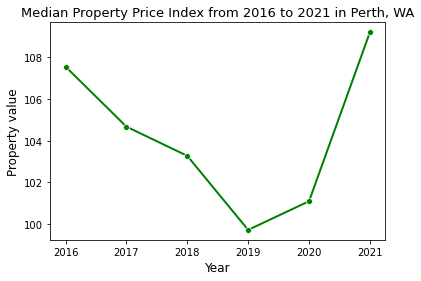

In [24]:
fig = plt.subplots(figsize = ( 6 , 4))
  
# Plot the scatterplot
ax =sns.lineplot(x="Year", y="Residential Property Price Index", data = data_Index, linewidth=2, color="green", marker='o',ci=None)
  
# Set label for x-axis
ax.set_xlabel( "Year" , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Property value" , size = 12 )
  
# Set title for plot
ax.set_title( "Median Property Price Index from 2016 to 2021 in Perth, WA" , size = 13)
  
# Display figure
plt.show()


In [25]:
df = data_clean.copy()

<AxesSubplot:xlabel='BEDROOMS', ylabel='PRICE'>

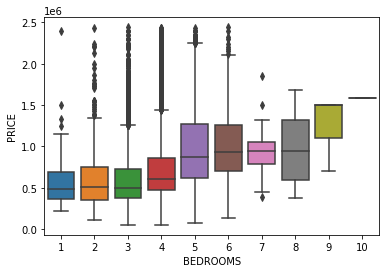

In [26]:
#Use the function boxplot in the seaborn library to determine houses of what number of bedrooms have more price outliers .
sns.boxplot(x='BEDROOMS', y='PRICE', data=df)

<AxesSubplot:xlabel='BATHROOMS', ylabel='PRICE'>

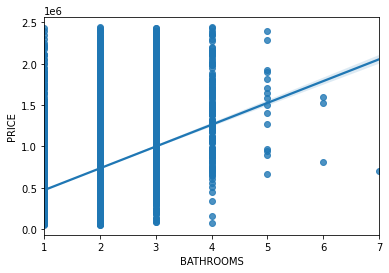

In [27]:
#the function regplot in the seaborn library helps to determine if the feature is negatively or positively correlated with price.
sns.regplot(x='BATHROOMS', y='PRICE', data=df)

<AxesSubplot:xlabel='FLOOR_AREA', ylabel='PRICE'>

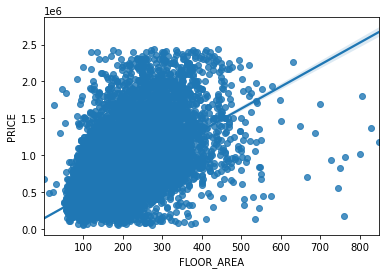

In [28]:
sns.regplot(x='FLOOR_AREA', y='PRICE', data=df)

<AxesSubplot:xlabel='NEAREST_SCH_RANK', ylabel='PRICE'>

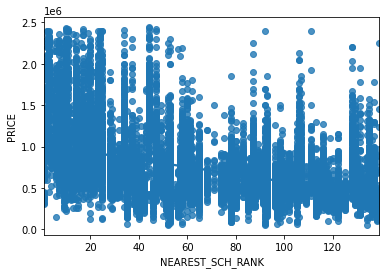

In [29]:
sns.regplot(x='NEAREST_SCH_RANK', y='PRICE', data=df)

In [30]:
#find the features that are more correlated with price by using the Pandas method corr()
df.corr()['PRICE'].sort_values()

NEAREST_SCH_RANK   -0.467939
CBD_DIST           -0.397360
LONGITUDE          -0.222881
BUILD_YEAR         -0.187287
NEAREST_STN_DIST   -0.140226
NEAREST_SCH_DIST   -0.047580
MONTH_SOLD         -0.013494
YEAR_SOLD           0.020928
LAND_AREA           0.046852
LATITUDE            0.049962
GARAGE              0.142947
BEDROOMS            0.262060
BATHROOMS           0.399477
FLOOR_AREA          0.560454
PRICE               1.000000
Name: PRICE, dtype: float64

Text(0.5, 1.0, 'Multi-Collinearity of features')

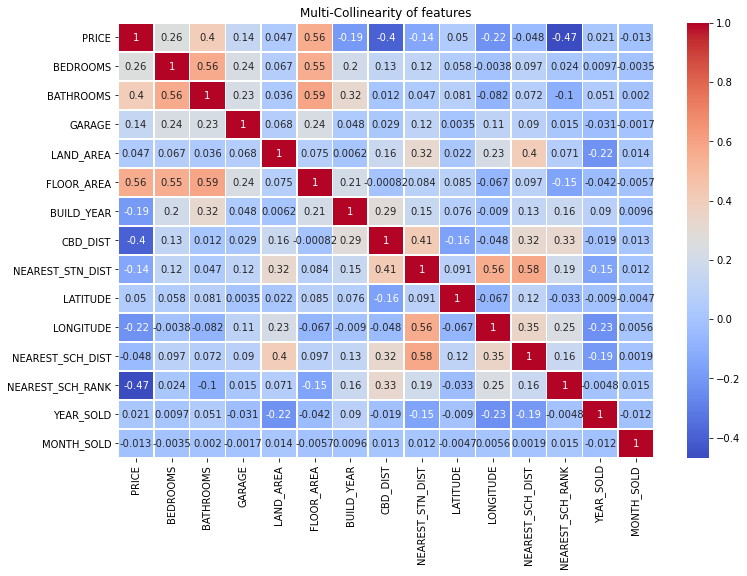

In [31]:
fig, ax = plt.subplots(figsize=(12,8))
#
sns.heatmap(df.corr(), linewidths=0.5, cmap='coolwarm', annot=True)
ax.set_title('Multi-Collinearity of features')

The heatmap shows correlation between the variables. It can be noticed that the Price of the property is most correlated with the size of the floor area (corr = 0.57). The other variables that affect the price are the school rank, the number of bathrooms, bedrooms and garage size, LONGITUDE (probably as a measurement of distance to the ocean given that LONGITUDE is the angular distance of a place east or west of the meridian, i.e. closer to the ocean or further inland) as well as distance to CBD and to the nearest school.
Based on this analysis I can select features that I would include in the futher analysis (|corr| > 0.1) and drop the others.
Chosen numerical columns:
FLOOR_AREA,
BATHROOMS,
BEDROOMS,
GARAGE,
BUILD_YEAR,
CBD_DIST,
LONGITUDE.

Drop the following columns:
MONTH_SOLD,
NEAREST_SCH_DIST,
NEAREST_STN_DIST,
YEAR_SOLD,
LATITUDE,
LAND_AREA.


<AxesSubplot:xlabel='NEAREST_SCH_RANK', ylabel='PRICE'>

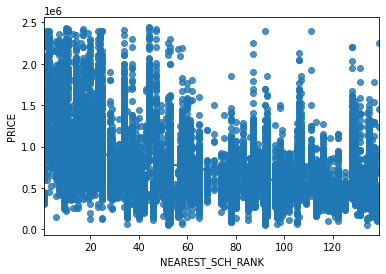

In [32]:
#a strong negative correlation between ranking of the school and the price 
sns.regplot(x="NEAREST_SCH_RANK", y="PRICE", data=df)

In [33]:
data_clean=data_clean.drop('MONTH_SOLD', axis=1)
data_clean=data_clean.drop('NEAREST_SCH_DIST', axis=1)
data_clean=data_clean.drop('NEAREST_STN_DIST', axis=1)
data_clean=data_clean.drop('YEAR_SOLD', axis=1)
data_clean=data_clean.drop('LATITUDE', axis=1)
data_clean=data_clean.drop('LAND_AREA', axis=1)

In [34]:
data_clean

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,FLOOR_AREA,BUILD_YEAR,CBD_DIST,LONGITUDE,NEAREST_SCH_RANK
1,Wandi,365000,3,2,2.0,139,2013.0,26900,115.859554,129.0
2,Camillo,287000,3,1,1.0,86,1979.0,22600,115.993579,113.0
9,Bayswater,685000,3,2,8.0,126,1999.0,5900,115.907050,29.0
11,Butler,367500,3,2,2.0,158,2003.0,36300,115.702200,39.0
13,Hammond Park,535000,4,2,4.0,247,2002.0,23100,115.849480,129.0
...,...,...,...,...,...,...,...,...,...,...
33646,Swanbourne,1700000,4,3,4.0,277,2009.0,9400,115.765149,24.0
33648,Aubin Grove,423000,3,2,2.0,108,2011.0,24900,115.858357,129.0
33649,Middle Swan,467000,4,2,2.0,132,2014.0,17100,116.013543,53.0
33650,South Fremantle,955000,3,2,1.0,127,1997.0,16000,115.756070,128.0


In [35]:
df=data_clean.copy()

In [36]:
# the dataset
#to build regression model we need to encode categorical variables 'SUBURB'
for col in ['SUBURB']:
    dummies = pd.get_dummies(df[col])
    df=pd.concat([df,dummies], axis = 1)
    df=df.drop(col,axis=1)

features = df.columns
features

Index(['PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'FLOOR_AREA', 'BUILD_YEAR',
       'CBD_DIST', 'LONGITUDE', 'NEAREST_SCH_RANK', 'Alexander Heights',
       ...
       'White Gum Valley', 'Willagee', 'Willetton', 'Wilson', 'Winthrop',
       'Woodbridge', 'Woodlands', 'Woodvale', 'Wooroloo', 'Yokine'],
      dtype='object', length=285)

In [37]:
#split dataset in features and target variable

y = df['PRICE']# Target variable
X = df.drop('PRICE', axis=1)# Features


In [38]:
y

1         365000
2         287000
9         685000
11        367500
13        535000
          ...   
33646    1700000
33648     423000
33649     467000
33650     955000
33651    1040000
Name: PRICE, Length: 19154, dtype: int64

In [39]:
X

,BEDROOMS,BATHROOMS,GARAGE,FLOOR_AREA,BUILD_YEAR,CBD_DIST,LONGITUDE,NEAREST_SCH_RANK,Alexander Heights,Alfred Cove,...,White Gum Valley,Willagee,Willetton,Wilson,Winthrop,Woodbridge,Woodlands,Woodvale,Wooroloo,Yokine
1,3,2,2.0,139,2013.0,26900,115.859554,129.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1.0,86,1979.0,22600,115.993579,113.0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,2,8.0,126,1999.0,5900,115.907050,29.0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,3,2,2.0,158,2003.0,36300,115.702200,39.0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,4,2,4.0,247,2002.0,23100,115.849480,129.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33646,4,3,4.0,277,2009.0,9400,115.765149,24.0,0,0,...,0,0,0,0,0,0,0,0,0,0
33648,3,2,2.0,108,2011.0,24900,115.858357,129.0,0,0,...,0,0,0,0,0,0,0,0,0,0
33649,4,2,2.0,132,2014.0,17100,116.013543,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
33650,3,2,1.0,127,1997.0,16000,115.756070,128.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#Modelling
#split the dataset 80:20 training:testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("Training split input - ", X_train.shape)
print("Testing split input - ", X_test.shape)

Training split input -  (15323, 284)
Testing split input -  (3831, 284)


In [41]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
# Fit regression model with X_train and y_train data

regr = DecisionTreeRegressor(max_depth=4, random_state=1234)
regr.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=4, random_state=1234)

In [42]:
#Predict the response for test dataset
y_pred = regr.predict(X_test)
y_pred

array([ 529028.6366018 , 1138268.18997912,  529028.6366018 , ...,
       1138268.18997912,  529028.6366018 ,  395644.14615958])

In [43]:
# Model Accuracy,Return the coefficient of determination  of the prediction.

acc_score = regr.score(X_test, y_test)

print("Accuracy:",acc_score)

#Model evalustion using R^2 for DTRegression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_pred)
print('R-square of the Dessirion TRee regression model is: ', r_square)


Accuracy: 0.6078980352430245
R-square of the Dessirion TRee regression model is:  0.6078980352430245


In [44]:
from sklearn.tree import export_graphviz

text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_7 <= 26.50
|   |--- feature_3 <= 204.50
|   |   |--- feature_3 <= 133.50
|   |   |   |--- feature_0 <= 3.50
|   |   |   |   |--- value: [734618.31]
|   |   |   |--- feature_0 >  3.50
|   |   |   |   |--- value: [1155198.95]
|   |   |--- feature_3 >  133.50
|   |   |   |--- feature_6 <= 115.82
|   |   |   |   |--- value: [1138268.19]
|   |   |   |--- feature_6 >  115.82
|   |   |   |   |--- value: [886810.61]
|   |--- feature_3 >  204.50
|   |   |--- feature_3 <= 289.50
|   |   |   |--- feature_7 <= 3.50
|   |   |   |   |--- value: [1748863.64]
|   |   |   |--- feature_7 >  3.50
|   |   |   |   |--- value: [1278404.76]
|   |   |--- feature_3 >  289.50
|   |   |   |--- feature_6 <= 115.85
|   |   |   |   |--- value: [1697388.91]
|   |   |   |--- feature_6 >  115.85
|   |   |   |   |--- value: [1431826.09]
|--- feature_7 >  26.50
|   |--- feature_3 <= 243.50
|   |   |--- feature_3 <= 159.50
|   |   |   |--- feature_5 <= 16850.00
|   |   |   |   |--- value: [529028.64]
|   |  

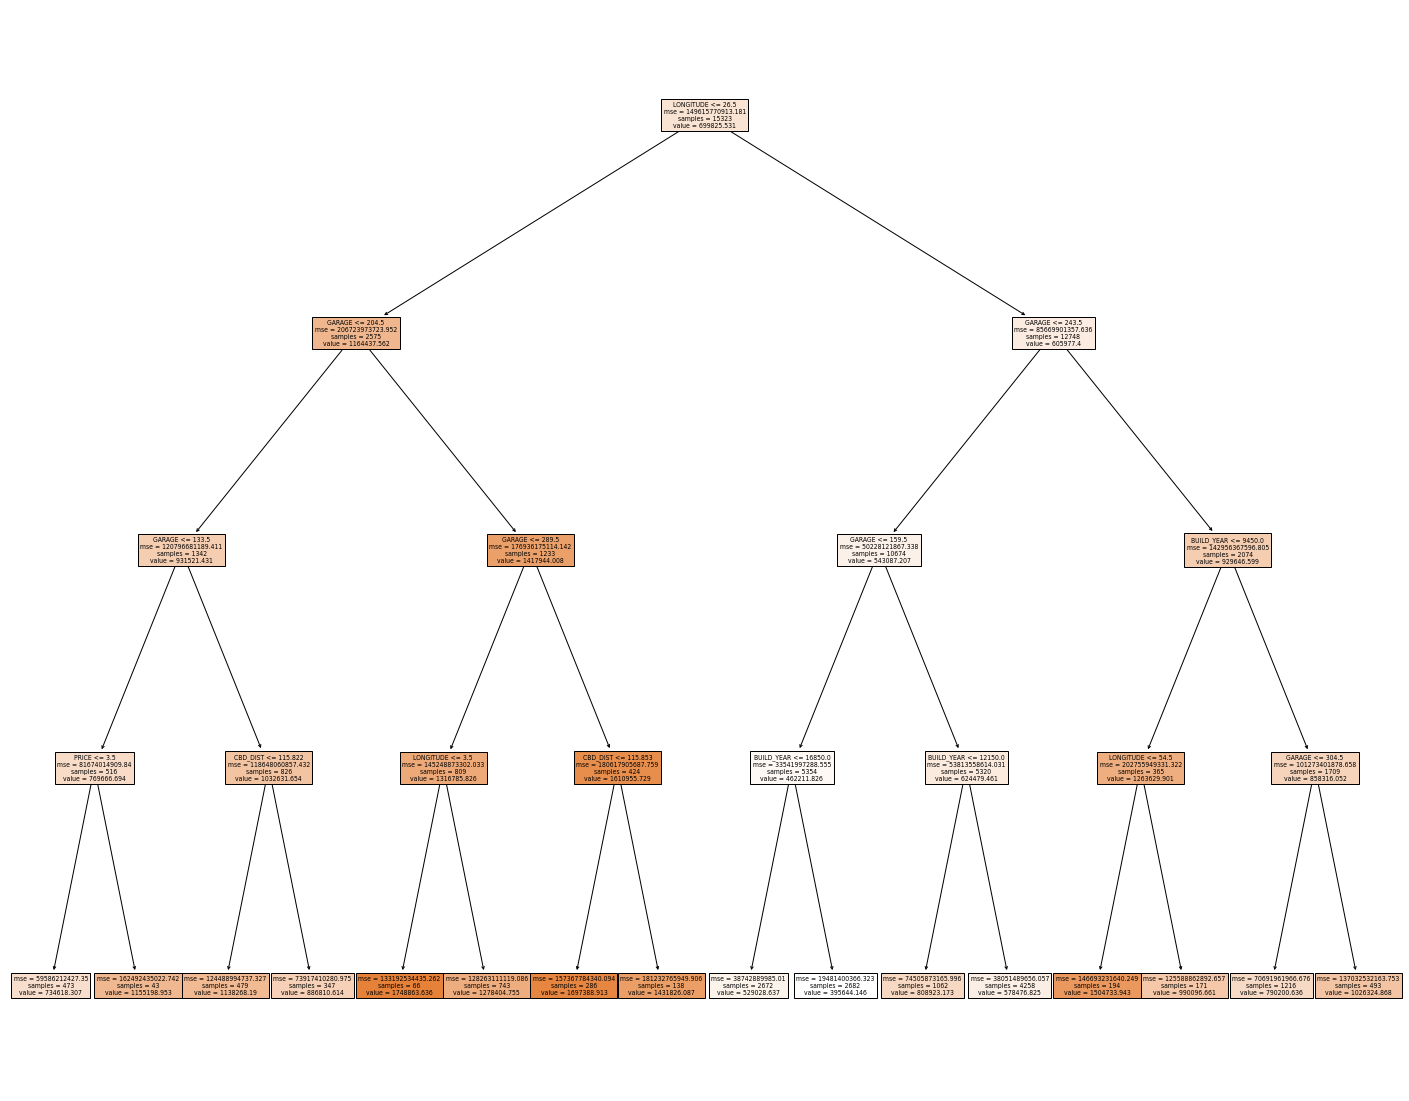

In [45]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=features, filled=True)

In [46]:
print("The predictions for following following 5 houses:")
print(X_test.head())
print("The predictions made for houses are : ")
print(regr.predict(X_test.head()))
print("The testing prices are : ")
print(y_test.head())

The predictions for following following 5 houses:
       BEDROOMS  BATHROOMS  GARAGE  FLOOR_AREA  BUILD_YEAR  CBD_DIST  \
10812         3          1     2.0          99      1989.0      9600   
15564         4          3     2.0         188      2007.0     13800   
635           3          2     2.0         119      2009.0      7200   
1860          3          1     2.0          80      1988.0     12200   
29893         3          1     2.0         134      1964.0     10200   

        LONGITUDE  NEAREST_SCH_RANK  Alexander Heights  Alfred Cove  ...  \
10812  115.931740             114.0                  0            0  ...   
15564  115.755010              25.0                  0            0  ...   
635    115.915303             102.0                  0            0  ...   
1860   115.792340              61.0                  0            0  ...   
29893  115.870750              16.0                  0            0  ...   

       White Gum Valley  Willagee  Willetton  Wilson  Winthr

10812     345000
15564     950000
635       450000
1860      495000
29893     761500
          ...   
17931     840000
29679     416000
24254    1950000
2810      590000
15821     468000
Name: PRICE, Length: 3831, dtype: int64
[ 529028.6366018  1138268.18997912  529028.6366018  ... 1138268.18997912
  529028.6366018   395644.14615958]


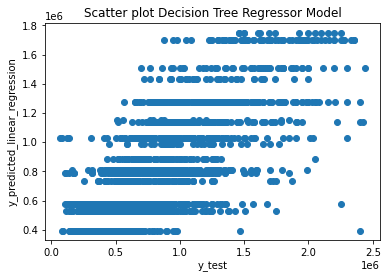

In [47]:
#Visualising the result

print(y_test)
print(y_pred)
plt.scatter(y_test, y_pred)
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})
plt.title('Scatter plot Decision Tree Regressor Model')
plt.xlabel('y_test')
plt.ylabel('y_predicted_linear_regression')
plt.show()

In [48]:
#linear regression model

from sklearn.linear_model import LinearRegression
Lregressor = LinearRegression()
Lregressor.fit(X_train, y_train) 


LinearRegression()

In [49]:
y_pred_lr = Lregressor.predict(X_test)
y_pred_lr

array([ 316885.16137695, 1216344.33532715,  464413.25549316, ...,
       1576642.70275879,  723432.11291504,  443926.69287109])

In [50]:
y_test

10812     345000
15564     950000
635       450000
1860      495000
29893     761500
          ...   
17931     840000
29679     416000
24254    1950000
2810      590000
15821     468000
Name: PRICE, Length: 3831, dtype: int64

In [51]:
from sklearn import metrics
r_square_lr = metrics.r2_score(y_test, y_pred_lr)
print('R-square of the Desicion Tree regression model is: ', r_square_lr)

R-square of the Desicion Tree regression model is:  0.7993302101268622


10812     345000
15564     950000
635       450000
1860      495000
29893     761500
          ...   
17931     840000
29679     416000
24254    1950000
2810      590000
15821     468000
Name: PRICE, Length: 3831, dtype: int64
[ 316885.16137695 1216344.33532715  464413.25549316 ... 1576642.70275879
  723432.11291504  443926.69287109]


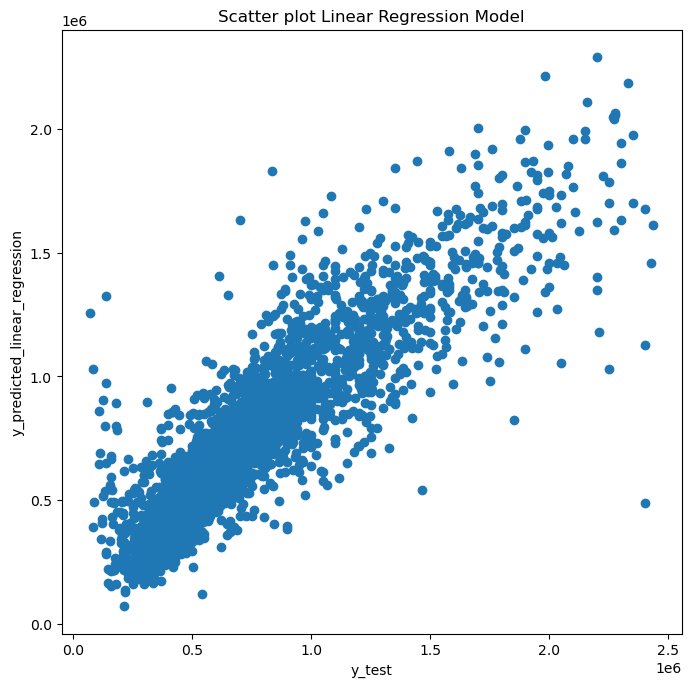

In [52]:
print(y_test)
print(y_pred_lr)
plt.scatter(y_test, y_pred_lr)
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':100})
plt.title('Scatter plot Linear Regression Model')
plt.xlabel('y_test')
plt.ylabel('y_predicted_linear_regression')
plt.show()

In [53]:
property_options= pd.read_csv('Documents\\MIT\\MDA512\\Assignment\\all_perth_310121\\property_for_sale.csv')
property_options

,DESCRIPTION,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,...,White Gum Valley,Willagee,Willetton,Wilson,Winthrop,Woodbridge,Woodlands,Woodvale,Wooroloo,Yokine
0,"4bed x 2bath x 1garage, Applecross, 200",11A Macrae Road,Applecross,1500000,4,2,1,489,200,2000,...,0,0,0,0,0,0,0,0,0,0
1,"3bed x 2bath x 2garage, Applecross, 72",2/11a Collier Street,Applecross,895000,3,2,2,1031,72,1960,...,0,0,0,0,0,0,0,0,0,0
2,"4bed x 3bath x 2garage, Burns Beach, 320",1 Piermont Avenue,Burns Beach,950000,4,3,2,510,320,2010,...,0,0,0,0,0,0,0,0,0,0
3,"4bed x 1bath x 3garage, Burns Beach, 120",16 Second Avenue,Burns Beach,650000,4,1,3,539,120,1990,...,0,0,0,0,0,0,0,0,0,0
4,"4bed x 2bath x 2garage, Karrinyup, 185",11 Trusley Way,Karrinyup,960000,4,2,2,680,185,2010,...,0,0,0,0,0,0,0,0,0,0
5,"4bed x 2bath x 2garage, Victoria Park, 161",101 Teague Street,Victoria Park,720000,4,2,2,220,161,2015,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# We need to bring the dataset property_options to the same format in order to be able to use it to predict the prices and then compare the predicted price with the agency's offered prices and give a recommendation to the investor
property_options=property_options.drop('ADDRESS', axis=1)
property_options=property_options.drop('NEAREST_SCH_DIST', axis=1)
property_options=property_options.drop('NEAREST_STN', axis=1)
property_options=property_options.drop('NEAREST_SCH', axis=1)
property_options=property_options.drop('NEAREST_STN_DIST', axis=1)
property_options=property_options.drop('LATITUDE', axis=1)
property_options=property_options.drop('LAND_AREA', axis=1)
property_options=property_options.drop('SUBURB', axis=1)
property_options

,DESCRIPTION,PRICE,BEDROOMS,BATHROOMS,GARAGE,FLOOR_AREA,BUILD_YEAR,CBD_DIST,LONGITUDE,NEAREST_SCH_RANK,...,White Gum Valley,Willagee,Willetton,Wilson,Winthrop,Woodbridge,Woodlands,Woodvale,Wooroloo,Yokine
0,"4bed x 2bath x 1garage, Applecross, 200",1500000,4,2,1,200,2000,7000,115.842981,34,...,0,0,0,0,0,0,0,0,0,0
1,"3bed x 2bath x 2garage, Applecross, 72",895000,3,2,2,72,1960,8300,115.830119,34,...,0,0,0,0,0,0,0,0,0,0
2,"4bed x 3bath x 2garage, Burns Beach, 320",950000,4,3,2,320,2010,28200,115.730373,80,...,0,0,0,0,0,0,0,0,0,0
3,"4bed x 1bath x 3garage, Burns Beach, 120",650000,4,1,3,120,1990,28000,115.722590,60,...,0,0,0,0,0,0,0,0,0,0
4,"4bed x 2bath x 2garage, Karrinyup, 185",960000,4,2,2,185,2010,13300,115.771070,47,...,0,0,0,0,0,0,0,0,0,0
5,"4bed x 2bath x 2garage, Victoria Park, 161",720000,4,2,2,161,2015,5100,115.904273,41,...,0,0,0,0,0,0,0,0,0,0


In [55]:
features_X = X.columns
features_X

Index(['BEDROOMS', 'BATHROOMS', 'GARAGE', 'FLOOR_AREA', 'BUILD_YEAR',
       'CBD_DIST', 'LONGITUDE', 'NEAREST_SCH_RANK', 'Alexander Heights',
       'Alfred Cove',
       ...
       'White Gum Valley', 'Willagee', 'Willetton', 'Wilson', 'Winthrop',
       'Woodbridge', 'Woodlands', 'Woodvale', 'Wooroloo', 'Yokine'],
      dtype='object', length=284)

In [56]:
y_agency_offers= property_options.drop(features_X, axis=1) 
y_agency_offers

,DESCRIPTION,PRICE
0,"4bed x 2bath x 1garage, Applecross, 200",1500000
1,"3bed x 2bath x 2garage, Applecross, 72",895000
2,"4bed x 3bath x 2garage, Burns Beach, 320",950000
3,"4bed x 1bath x 3garage, Burns Beach, 120",650000
4,"4bed x 2bath x 2garage, Karrinyup, 185",960000
5,"4bed x 2bath x 2garage, Victoria Park, 161",720000


In [57]:
X_agency_options=property_options.drop(['DESCRIPTION','PRICE'], axis=1) #features of the propertis that are offered by the agency
X_agency_options

,BEDROOMS,BATHROOMS,GARAGE,FLOOR_AREA,BUILD_YEAR,CBD_DIST,LONGITUDE,NEAREST_SCH_RANK,Alexander Heights,Alfred Cove,...,White Gum Valley,Willagee,Willetton,Wilson,Winthrop,Woodbridge,Woodlands,Woodvale,Wooroloo,Yokine
0,4,2,1,200,2000,7000,115.842981,34,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,2,2,72,1960,8300,115.830119,34,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,3,2,320,2010,28200,115.730373,80,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,3,120,1990,28000,115.722590,60,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,2,185,2010,13300,115.771070,47,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,2,2,161,2015,5100,115.904273,41,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y_agency_price_predicted=Lregressor.predict(X_agency_options)
y_agency_price_predicted

array([1315284.80847168, 1137156.68225098, 1011072.41455078,
        568007.73327637,  873645.40551758,  690756.83374023])

In [59]:

#convert list to DataFrame
y_agency_price_predicted1 = pd.DataFrame(y_agency_price_predicted, columns=['Predicted_Price'])
y_agency_price_predicted1

,Predicted_Price
0,1.315285e+06
1,1.137157e+06
2,1.011072e+06
3,5.680077e+05
4,8.736454e+05
5,6.907568e+05


In [60]:
comparison_table = pd.concat([y_agency_offers, y_agency_price_predicted1], axis = 1)
comparison_table


,DESCRIPTION,PRICE,Predicted_Price
0,"4bed x 2bath x 1garage, Applecross, 200",1500000,1.315285e+06
1,"3bed x 2bath x 2garage, Applecross, 72",895000,1.137157e+06
2,"4bed x 3bath x 2garage, Burns Beach, 320",950000,1.011072e+06
3,"4bed x 1bath x 3garage, Burns Beach, 120",650000,5.680077e+05
4,"4bed x 2bath x 2garage, Karrinyup, 185",960000,8.736454e+05
5,"4bed x 2bath x 2garage, Victoria Park, 161",720000,6.907568e+05


<AxesSubplot:xlabel='PRICE', ylabel='Predicted_Price'>

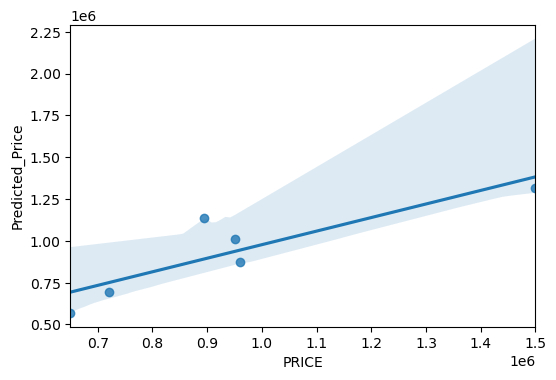

In [61]:
sns.regplot(x="PRICE", y="Predicted_Price", data=comparison_table)

In [62]:
df_table = pd.melt(comparison_table, id_vars="DESCRIPTION", var_name="Type", value_name="Price")
df_table

,DESCRIPTION,Type,Price
0,"4bed x 2bath x 1garage, Applecross, 200",PRICE,1.500000e+06
1,"3bed x 2bath x 2garage, Applecross, 72",PRICE,8.950000e+05
2,"4bed x 3bath x 2garage, Burns Beach, 320",PRICE,9.500000e+05
3,"4bed x 1bath x 3garage, Burns Beach, 120",PRICE,6.500000e+05
4,"4bed x 2bath x 2garage, Karrinyup, 185",PRICE,9.600000e+05
5,"4bed x 2bath x 2garage, Victoria Park, 161",PRICE,7.200000e+05
6,"4bed x 2bath x 1garage, Applecross, 200",Predicted_Price,1.315285e+06
7,"3bed x 2bath x 2garage, Applecross, 72",Predicted_Price,1.137157e+06
8,"4bed x 3bath x 2garage, Burns Beach, 320",Predicted_Price,1.011072e+06
9,"4bed x 1bath x 3garage, Burns Beach, 120",Predicted_Price,5.680077e+05


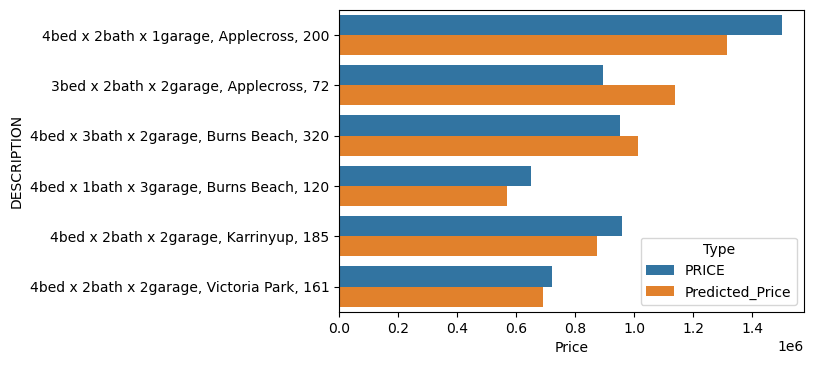

In [63]:
import matplotlib.pyplot as plt
plot = sns.barplot(y = df_table.DESCRIPTION, x = df_table.Price, hue = df_table.Type)

IMPLEMENTATION

In [64]:
comparison_table['Advice'] = pd.NaT
comparison_table

comparison_table.loc[comparison_table['PRICE'] < comparison_table['Predicted_Price'], 'Advice']='worth buying'
comparison_table.loc[comparison_table['PRICE'] > comparison_table['Predicted_Price'], 'Advice']='negotiate the price or reject'

#format the style of the numerical column
format_dict = {col_name: '{:.2f}' for col_name in comparison_table.select_dtypes(float).columns}
comparison_table.style.format(format_dict)


,DESCRIPTION,PRICE,Predicted_Price,Advice
0,"4bed x 2bath x 1garage, Applecross, 200",1500000,1315284.81,negotiate the price or reject
1,"3bed x 2bath x 2garage, Applecross, 72",895000,1137156.68,worth buying
2,"4bed x 3bath x 2garage, Burns Beach, 320",950000,1011072.41,worth buying
3,"4bed x 1bath x 3garage, Burns Beach, 120",650000,568007.73,negotiate the price or reject
4,"4bed x 2bath x 2garage, Karrinyup, 185",960000,873645.41,negotiate the price or reject
5,"4bed x 2bath x 2garage, Victoria Park, 161",720000,690756.83,negotiate the price or reject
